In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk
import ast
import re

In [112]:
two_word_df = pd.read_csv('bigram_counts.csv')
two_word_df.head()

,Bigram,Count
0,"('n', 'know')",6347
1,"('ca', 'n')",6254
2,"('los', 'angeles')",5723
3,"('would', 'like')",5112
4,"('little', 'bit')",4595


filtering

In [113]:
bigrams_to_remove = {
    ('little', 'bit'),
    ('make', 'sure'),
    ('thank', 'much'),
    ('go', 'ahead'),
    ('gon', 'na'),
    ('going', 'go'),
    ('come', 'back'),
    ('want', 'make'),
    ('really', 'really'),
    ('sorry', 'sorry'),
    ('go', 'back'),
    ('going', 'going'),
    ('two', 'minutes'),
    ('years', 'ago'),
    ('one', 'thing'),
    ('going', 'able'),
    ('okay', 'thank'),
    ('want', 'say'),
    ('yes', 'commissioner'),
    ('even', 'though'),
    ('like', 'see'),
    ('bit', 'little'),
    ('looks', 'like'),
    ('let', 'see'),
    ('thank', 'mr'),
    ('one', 'one'),
    ('give', 'us'),
    ('think', 'think'),
    ('going', 'say'),
    ('feel', 'like'),
    ('think', 'going'),
    ('know', 'going'),
    ('going', 'take'),
    ('going', 'get'),
    ('want', 'thank'),
    ('anything', 'else'),
    ('like', 'make'),
    ('let', 'go'),
    ('state', 'name'),
    ('going', 'make'),
    ('seems', 'like'),
    ('want', 'see'),
    ('look', 'like'),
    ('much', 'time'),
    ('answer', 'questions'),
    ('want', 'go'),
    ('pretty', 'much'),
    ('think', 'need'),
    ('know', 'know'),
    ('think', 'really'),
    ('thank', 'thank'),
    ('take', 'look'),
    ('hi', 'name'),
    ('right', 'way'),
    ('time', 'going'),
    ('something', 'like'),
    ('going', 'ask'),
    ('say', 'going'),
    ('one', 'time'),
    ('thank', 'time'),
    ('sounds', 'like'),
    ('going', 'put'),
    ('right', 'right'),
    ('okay', 'going'),
    ('first', 'time'),
    ('also', 'want'),
    ('let', 'say'),
    ('let', 'know'),
    ('going', 'hear'),
    ('many', 'people'),
    ('think', 'great'),
    ('like', 'say'),
    ('think', 'good'),
    ('certainly', 'commissioner'),
    ('make', 'sense'),
    ('help', 'us'),
    ('last', 'time'),
    ('one', 'question'),
    ('tell', 'us'),
    ('going', 'back'),
    ('thank', 'sir'),
    ('well', 'think'),
    ('trying', 'get'),
    ('many', 'years'),
    ('wanted', 'make'),
    ('like', 'said'),
    ('please', 'come'),
    ('able', 'get'),
    ('every', 'day'),
    ('go', 'next'),
    ('thank', 'commissioner'),
    ('look', 'forward'),
    ('like', 'know'),
    ('couple', 'things'),
    ('okay', 'okay'),
    ('right', 'away'),
    ('one', 'way'),
    ('want', 'know'),
    ('good', 'idea'),
    ('like', 'thank'),
    ('also', 'like'),
    ('like', 'ask'),
    ('next', 'one'),
    ('los', 'angeles'),
    ('specific', 'plan'),
    ('neighborhood', 'council'),
    ('city', 'planning'),
    ('planning', 'department'),
    ('square', 'feet'),
    ('community', 'plan'),
    ('single', 'family'),
    ('public', 'comment'),
    ('item', 'number'),
    ('planning', 'commission'),
    ('city', 'attorney'),
    ('open', 'space'),
    ('good', 'morning'),
    ('1', '1'),
    ('general', 'plan'),
    ('council', 'office'),
    ('zoning', 'administrator'),
    ('public', 'hearing'),
    ('city', 'council'),
    ('staff', 'report'),
    ('conditional', 'use'),
    ('make', 'motion'),
    ('square', 'foot'),
    ('good', 'afternoon'),
    ('000', 'square'),
    ('speaker', 'card'),
    ('zone', 'change'),
    ('city', 'los'),
    ('project', 'site'),
    ('condition', 'number'),
    ('support', 'project'),
    ('across', 'street'),
    ('density', 'bonus'),
    ('speaker', 'cards'),
    ('site', 'plan'),
    ('floor', 'area'),
    ('planning', 'staff'),
    ('five', 'minutes'),
    ('case', 'number'),
    ('proposed', 'project'),
    ('number', 'one'),
    ('low', 'income'),
    ('deny', 'appeal'),
    ('city', 'city'),
    ('move', 'forward'),
    ('good', 'evening'),
    ('plan', 'approval'),
    ('property', 'owner'),
    ('department', 'city'),
    ('number', 'two'),
    ('one', 'things'),
    ('property', 'line'),
    ('name', 'address'),
    ('council', 'district'),
    ('area', 'planning'),
    ('number', 'three'),
    ('municipal', 'code'),
    ('8', '8'),
    ('advisory', 'agency'),
    ('state', 'state'),
    ('long', 'time'),
    ('coastal', 'commission'),
    ('five', 'years'),
    ('mixed', 'use'),
    ('attorney', 'office'),
    ('plan', 'area'),
    ('one', 'two'),
    ('project', 'project'),
    ('10', 'minutes'),
    ('4', '4'),
    ('director', 'planning'),
    ('number', 'four'),
    ('lot', 'people'),
    ('two', 'years'),
    ('000', '000'),
    ('think', 'important'),
    ('grant', 'appeal'),
    ('motion', 'carries'),
    ('vote', 'commissioner'),
    ('hours', 'operation'),
    ('negative', 'declaration'),
    ('go', 'right'),
    ('item', 'agenda'),
    ('things', 'like'),
    ('set', 'back'),
    ('project', 'permit'),
    ('commissioner', 'donovan'),
    ('agenda', 'item'),
    ('two', 'three'),
    ('one', 'minute'),
    ('three', 'minutes'),
    ('1', '5'),
    ('close', 'public'),
    ('20', 'years'),
    ('10', 'years'),
    ('commissioners', 'name'),
    ('plan', 'review'),
    ('think', 'one'),
    ('three', 'years'),
    ('make', 'decision'),
    ('substantial', 'evidence'),
    ('number', 'five'),
    ('project', 'going'),
    ('going', 'call'),
    ('bureau', 'engineering'),
    ('department', 'building'),
    ('staff', 'recommendation'),
    ('comment', 'period'),
    ('last', 'year'),
    ('first', 'one'),
    ('west', 'side'),
    ('commissioner', 'halper'),
    ('next', 'item'),
    ('afternoon', 'commissioners'),
    ('review', 'board'),
    ('right', 'next'),
    ('community', 'community'),
    ('morning', 'commissioners'),
    ('second', 'motion'),
    ('10', 'feet'),
    ('santa', 'monica'),
    ('three', 'four'),
    ('30', 'feet'),
    ('make', 'findings'),
    ('lot', 'work'),
    ('number', 'seven'),
    ('project', 'think'),
    ('project', 'also'),
    ('next', 'meeting'),
    ('second', 'commissioner'),
    ('address', 'record'),
    ('mitigated', 'negative'),
    ('plan', 'amendment'),
    ('short', 'term'),
    ('join', 'line'),
    ('part', 'project'),
    ('categorical', 'exemption'),
    ('moving', 'forward'),
    ('fellow', 'commissioners'),
    ('mr', 'president'),
    ('approve', 'project'),
    ('7', '11'),
    ('commissioner', 'foster'),
    ('public', 'right'),
    ('next', 'slide'),
    ('fill', 'speaker'),
    ('dake', 'wilson'),
    ('public', 'testimony'),
    ('new', 'york'),
    ('commission', 'business'),
    ('1', '2'),
    ('people', 'going'),
    ('want', 'speak'),
    ('making', 'sure'),
    ('number', 'six'),
    ('call', 'vote'),
    ('going', 'start'),
    ('answer', 'question'),
    ('right', 'thank'),
    ('30', 'years'),
    ('going', 'give'),
    ('motion', 'carried'),
    ('able', 'make'),
    ('really', 'good'),
    ('20', 'feet'),
    ('ask', 'question'),
    ('going', 'come'),
    ('think', 'know'),
    ('want', 'get'),
    ('right', 'ahead'),
    ('please', 'call'),
    ('0', '0'),
    ('first', 'second'),
    ('every', 'single'),
    ('know', 'think'),
    ('many', 'many'),
    ('makes', 'sense'),
    ('45', 'feet'),
    ('okay', 'let'),
    ('really', 'want'),
    ('really', 'appreciate'),
    ('lot', 'things'),
    ('please', 'please'),
    ('okay', 'well'),
    ('going', 'happen'),
    ('great', 'deal')
}

In [114]:
words_to_remove = {
    'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with',
    'by', 'from', 'up', 'about', 'into', 'over', 'after', 'is', 'are', 'was', 'were',
    'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
    'shall', 'should', 'can', 'could', 'may', 'might', 'must', 'ought', 'i', 'you',
    'he', 'she', 'it', 'we', 'they', 'them', 'their', 'his', 'her', 'its', 'our', 'your',
    'um', 'uh', 'eh', 'ah', 'oh', 'hmm', 'er', 'em', 'n'
}

In [115]:


def safe_eval_and_filter(s):
    try:
        bigram = ast.literal_eval(s)
        if isinstance(bigram, tuple) and len(bigram) == 2:
            word1, word2 = bigram
            if word1.lower() in words_to_remove or word2.lower() in words_to_remove or bigram in bigrams_to_remove:
                return None
            return ' '.join(bigram)
        else:
            return None
    except:
        return None

two_word_df['Bigram'] = two_word_df['Bigram'].apply(safe_eval_and_filter)
two_word_df = two_word_df.dropna(subset=['Bigram'])

bigram_dict = dict(zip(two_word_df['Bigram'], two_word_df['Count']))
dict(list(bigram_dict.items())[:50])

{'building safety': 3081,
 'land use': 3052,
 'affordable housing': 2971,
 'parking spaces': 2280,
 'parking lot': 2005,
 'development agreement': 931,
 'fire department': 864,
 'ground floor': 826,
 'building permit': 811,
 'use permit': 802,
 'conditions approval': 802,
 'zoning code': 790,
 'mitigation measures': 789,
 'square footage': 716,
 'design review': 715,
 'council member': 708,
 'community plans': 700,
 'two story': 700,
 'small lot': 693,
 'design guidelines': 690,
 'dwelling units': 685,
 'front yard': 669,
 'property owners': 656,
 'coastal development': 630,
 'long term': 619,
 'development permit': 611,
 'next door': 587,
 'state law': 581,
 'track map': 566,
 'multi family': 555,
 'urban design': 543,
 'parcel map': 540,
 'zoning administrators': 538,
 'high school': 527,
 'environmental impact': 523,
 'apartment building': 521,
 'certificate occupancy': 518,
 'traffic study': 516,
 'subject property': 514,
 'master plan': 497,
 'beer wine': 496,
 'side yard': 488,
 

In [116]:
two_word_df.head()

,Bigram,Count
14,building safety,3081
15,land use,3052
16,affordable housing,2971
24,parking spaces,2280
33,parking lot,2005


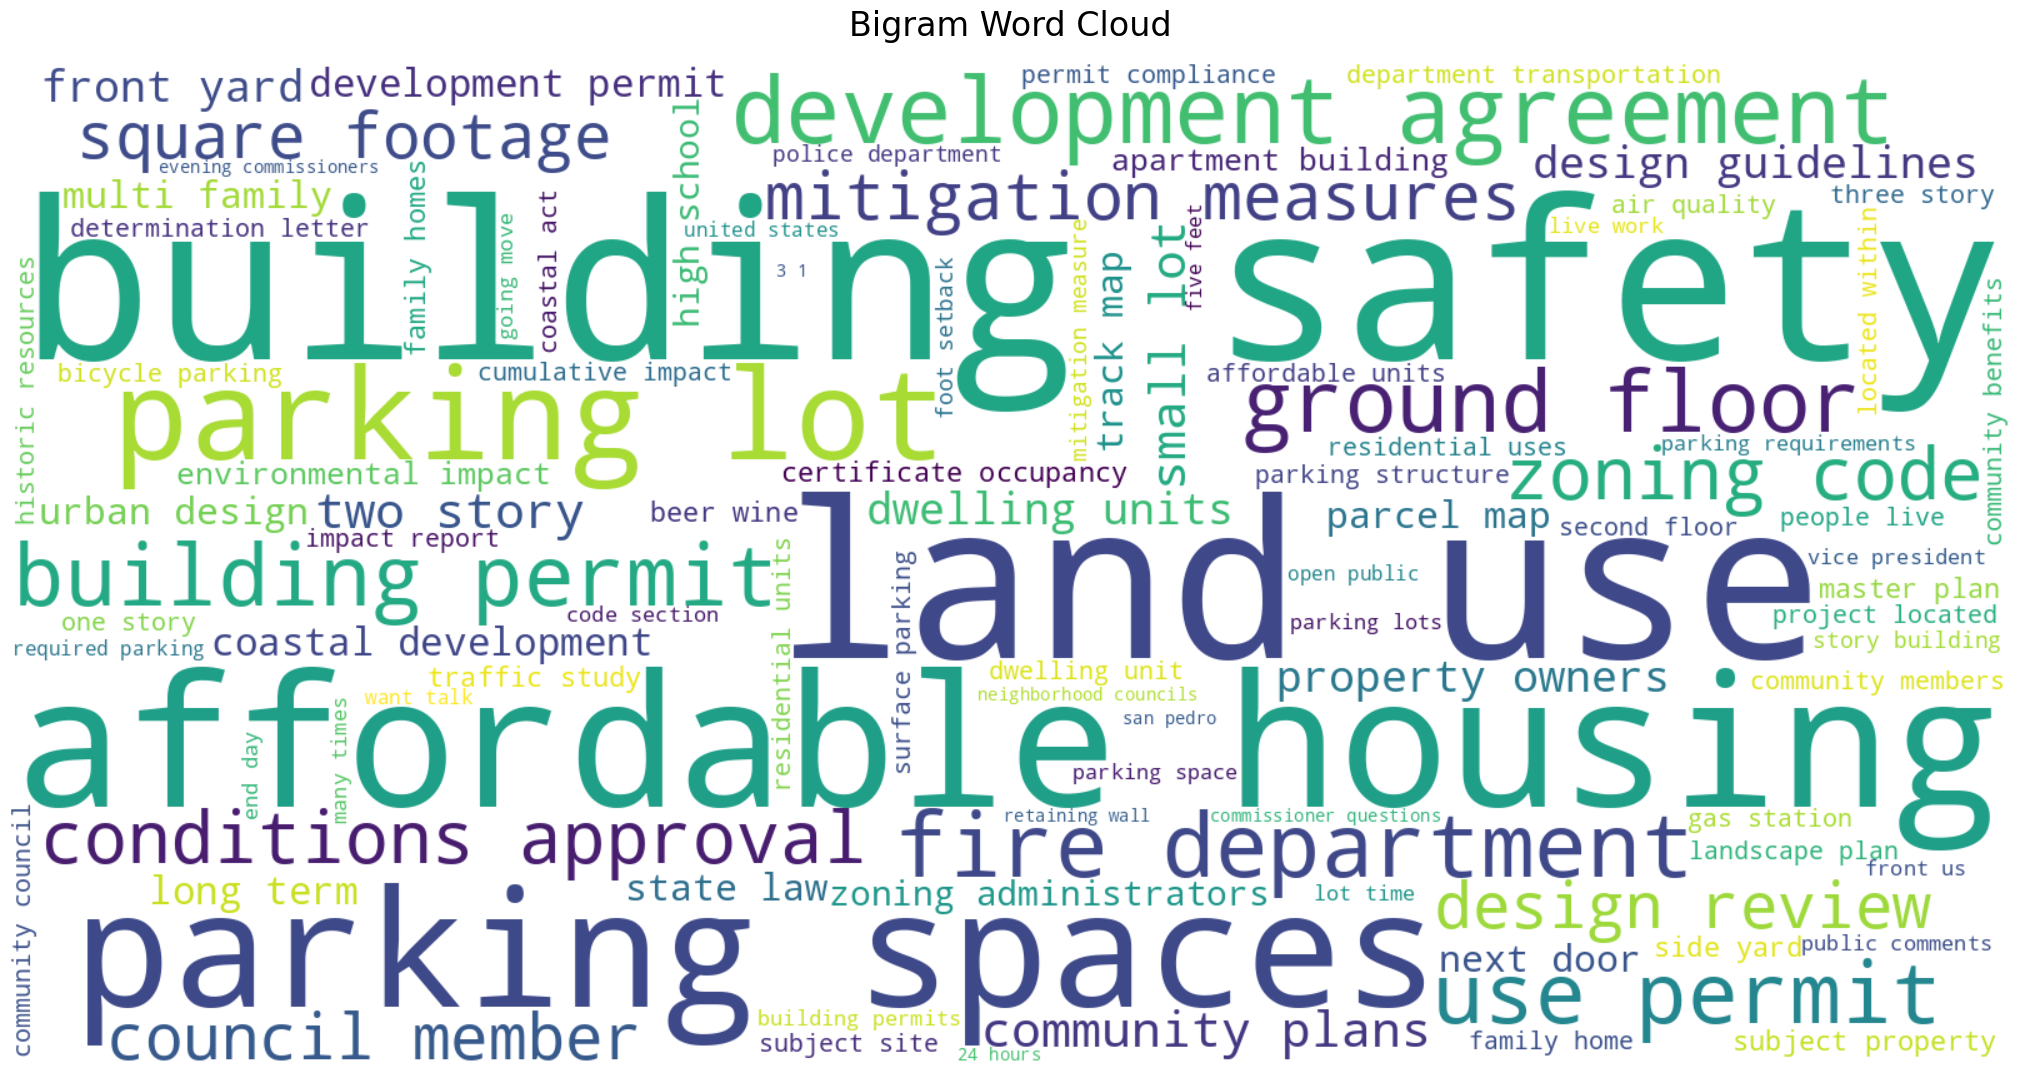

In [119]:
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    max_words=100,
    min_font_size=10,
    colormap='viridis',
    random_state=42
)

wordcloud.generate_from_frequencies(bigram_dict)
plt.figure(figsize=(20, 15), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Bigram Word Cloud', fontsize=24, pad=20)

plt.show()